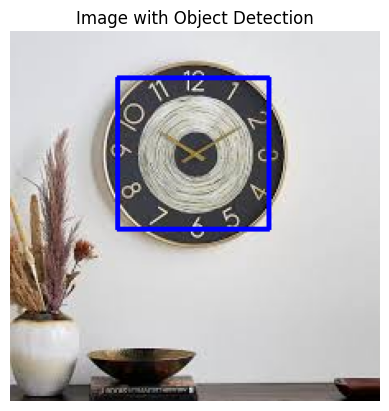

In [55]:
import cv2
import matplotlib.pyplot as plt

classifier_path = '/content/haarcascade_wallclock.xml'
input_path = '/content/download.jpeg'

classifier = cv2.CascadeClassifier(classifier_path)

def display_frame(frame, title="Video Frame with Detection"):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_frame)
    plt.axis('off')
    plt.title(title)
    plt.show()

if input_path.endswith(('.mp4', '.avi', '.mov')):
    cap = cv2.VideoCapture(input_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        objects = classifier.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in objects:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        display_frame(frame, title="Video Frame with Object Detection")

    cap.release()

else:
    image = cv2.imread(input_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    objects = classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in objects:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    display_frame(image, title="Image with Object Detection")
